# INTRODUCTION

Before delving into this analysis, it is recommended to review the [EDA Notebook](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights), which provides a comprehensive overview of the dataset and its key features. This initial exploration sets the stage for a deeper dive into Principal Component Analysis (PCA) and clustering methods.

In this notebook, PCA is applied not only to the raw data but also to the scaled data to reduce its dimensionality and identify the most significant components. The country column, being a categorical variable, is excluded from the PCA. Additionally, the average score, which is dependent on other variables, is also excluded from PCA and subsequent clustering analyses.

Due to the fact that the `factoextra` package cannot be run directly on Kaggle, this notebook was executed locally and saved directly. For similar analyses, it is recommended to download the code and run it locally rather than forking it on Kaggle.

Following this, clustering the PCA-transformed data using algorithms such as K-means and K-medoids will be conducted in subsequent notebooks. These clustering techniques will help group countries based on their prosperity indicators and uncover hidden patterns in the data.

The notebook consists of the following sections:
1. **PCA Implementation**: Applying PCA to both raw and scaled data.
2. **Distance Matrix Visualizations**: Comparing Euclidean and Manhattan distances for different data representations.

By the end of this notebook, a clear understanding of the underlying structure of the data is achieved, preparing for more detailed clustering analyses in future work.


In [1]:
library(factoextra)
library(dplyr)
library(tibble)
library(corrplot)
library(stats)
library(gridExtra)

data=read.csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")
head(data)

data <- data %>%
  column_to_rownames(var = "Country")
head(data)

Zorunlu paket yükleniyor: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa





Attaching package: ‘dplyr’





The following objects are masked from ‘package:stats’:



    filter, lag





The following objects are masked from ‘package:base’:



    intersect, setdiff, setequal, union





corrplot 0.92 loaded





Attaching package: ‘gridExtra’





The following object is masked from ‘package:dplyr’:



    combine






,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
2,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
3,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
4,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
5,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
6,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49


,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49


# PCA

## PCA WITH RAW DATA

### Explained Variance

In [2]:
data=data[,2:13]
pca_data=prcomp(data)
summary(pca_data)

Importance of components:
                           PC1      PC2      PC3     PC4     PC5     PC6
Standard deviation     47.8810 17.15748 10.71931 9.95843 7.26517 5.89731
Proportion of Variance  0.7672  0.09851  0.03845 0.03319 0.01766 0.01164
Cumulative Proportion   0.7672  0.86570  0.90415 0.93734 0.95500 0.96664
                           PC7     PC8     PC9    PC10   PC11    PC12
Standard deviation     5.08922 5.05572 4.08182 3.64378 3.1422 2.90083
Proportion of Variance 0.00867 0.00855 0.00558 0.00444 0.0033 0.00282
Cumulative Proportion  0.97531 0.98386 0.98944 0.99388 0.9972 1.00000

The explained variance summary shows the standard deviation, proportion of variance, and cumulative proportion for each principal component. PC1 and PC2 explain 76.7% and 9.9% of the variance respectively, making them the most significant components. The cumulative proportion indicates that together, these two components capture 86.6% of the total variance in the dataset.


### Eigenvalues and Variance

In [3]:
eig.val <- get_eigenvalue(pca_data)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,2292.587316,76.7190765,76.71908
Dim.2,294.379017,9.8510910,86.57017
Dim.3,114.903685,3.8451336,90.41530
Dim.4,99.170284,3.3186316,93.73393
Dim.5,52.782689,1.7663184,95.50025
Dim.6,34.778243,1.1638181,96.66407
Dim.7,25.900111,0.8667206,97.53079
Dim.8,25.560347,0.8553507,98.38614
Dim.9,16.661237,0.5575512,98.94369


The eigenvalues provide insight into the amount of variance explained by each principal component. The first principal component (Dim.1) has a significantly higher eigenvalue compared to the others, indicating it explains a large portion of the variance. The second principal component (Dim.2) also explains a notable amount of variance, further justifying the selection of the first two components for analysis. The subsequent components contribute progressively less to the explained variance, making them less significant for capturing the dataset's overall structure.

### Scree Plot


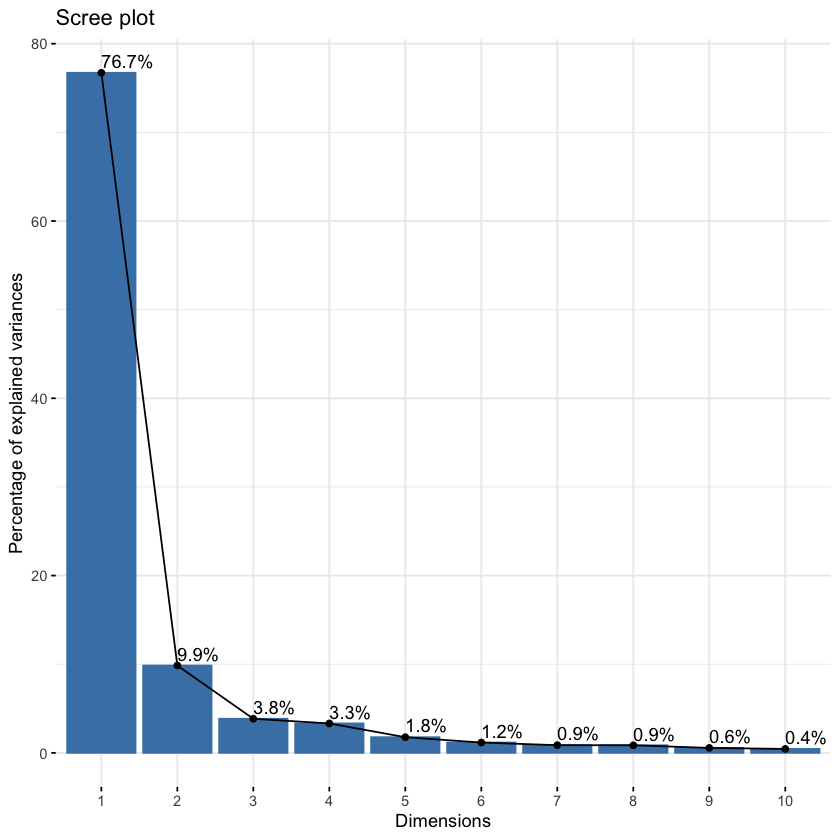

In [4]:
fviz_eig(pca_data, addlabels = TRUE)

The Scree Plot indicates the percentage of variance explained by each principal component. The first component (PC1) explains 76.7% of the total variance, while the second component (PC2) explains 9.9%. Together, the first two components explain 86.6% of the total variance. This suggests that the majority of the data's variability can be captured with just these two components.


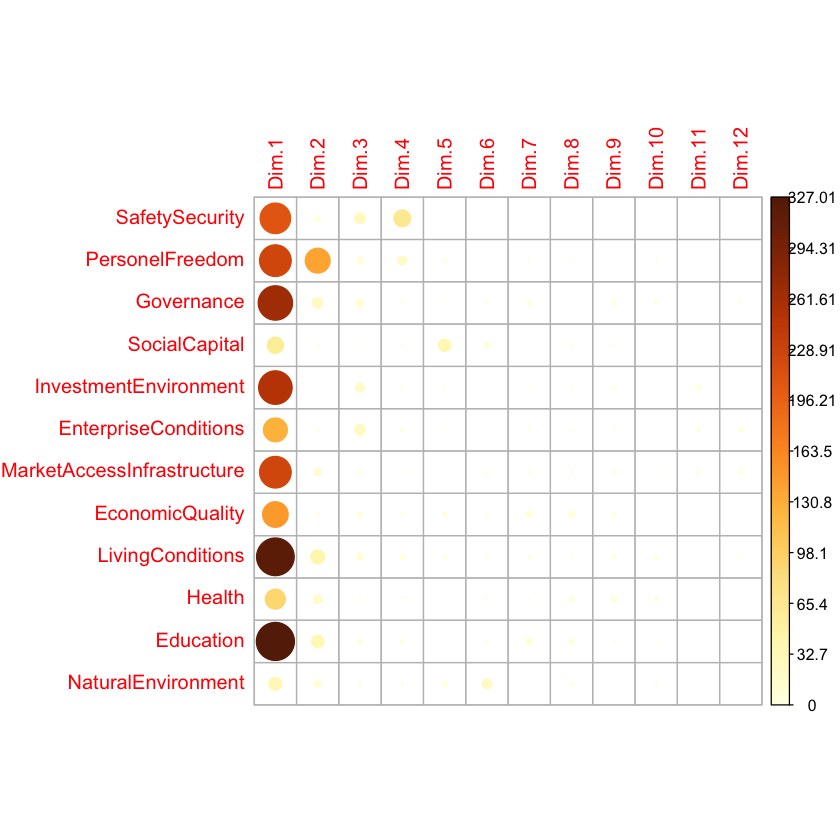

In [5]:
res.var <- get_pca_var(pca_data)
corrplot(res.var$cos2, is.corr=FALSE)



### Heatmap of Variable Contributions
The heatmap visualizes the contribution of each variable to the different principal components. This plot helps to identify which variables are most influential in defining the principal components. The intensity and size of the circles represent the magnitude of each variable's contribution to the respective principal components.


### Interpretation and Dimension Selection
- **Significance of PC1 and PC2:** The Scree Plot and explained variance summary both indicate that the first two principal components capture the majority of the dataset's variability. This makes them crucial for understanding the data's structure.
- **Contribution of Subsequent Components:** The subsequent components (from PC3 onwards) each explain a much smaller proportion of the variance, with diminishing returns. For instance, PC3 explains only 3.8% and PC4 explains 3.3% of the variance.
- **Dimension Selection:** Given that PC1 and PC2 together explain 86.6% of the variance, selecting these two dimensions is sufficient for capturing the most important aspects of the data. This reduces complexity while retaining the majority of the information.

### Conclusion
Choosing two dimensions (PC1 and PC2) for PCA is sufficient for this dataset, as it captures most of the variance and simplifies further analysis and visualization. This approach helps in reducing the dimensionality of the data while retaining the critical information needed for meaningful insights. However, it should be noted that the representation of certain variables, such as Social Capital, Health, and Natural Environment, is quite low in the first two principal components. This indicates that the model may not be fully adequate for analyses focused on these specific aspects.

## PCA WITH SCALED DATA

### Explained Variance


In [6]:
scaled_pca_data <- prcomp(data, center = TRUE, scale. = TRUE)
summary(scaled_pca_data)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.9893 1.03476 0.73463 0.62038 0.59649 0.52101 0.3888
Proportion of Variance 0.7446 0.08923 0.04497 0.03207 0.02965 0.02262 0.0126
Cumulative Proportion  0.7446 0.83386 0.87884 0.91091 0.94056 0.96318 0.9758
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.31309 0.27118 0.21226 0.20084 0.18356
Proportion of Variance 0.00817 0.00613 0.00375 0.00336 0.00281
Cumulative Proportion  0.98395 0.99008 0.99383 0.99719 1.00000

The explained variance summary shows the standard deviation, proportion of variance, and cumulative proportion for each principal component. PC1 and PC2 explain 74.5% and 8.9% of the variance respectively, making them the most significant components. The cumulative proportion indicates that together, these two components capture 83.4% of the total variance in the dataset.

### Scree Plot


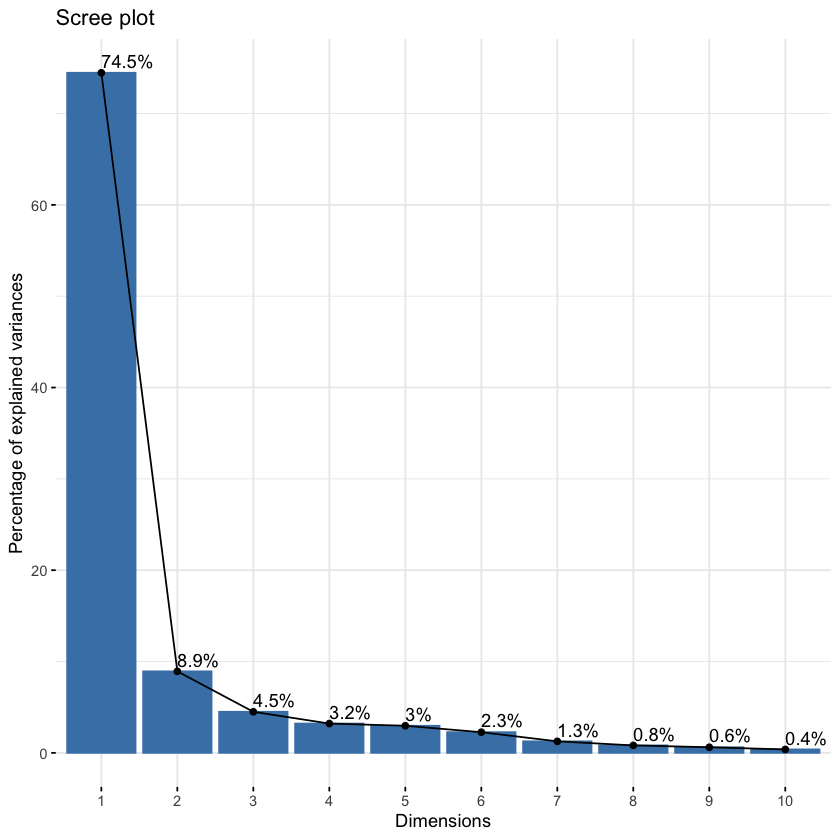

In [8]:
fviz_eig(scaled_pca_data, addlabels = TRUE)


The Scree Plot indicates the percentage of variance explained by each principal component. The first component (PC1) explains 74.5% of the total variance, while the second component (PC2) explains 8.9%. Together, the first two components explain 83.4% of the total variance. This suggests that the majority of the data's variability can be captured with just these two components.

### Eigenvalues and Variance

In [9]:
eig.val <- get_eigenvalue(scaled_pca_data)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,8.93563218,74.4636015,74.46360
Dim.2,1.07073448,8.9227874,83.38639
Dim.3,0.53968351,4.4973626,87.88375
Dim.4,0.38487052,3.2072544,91.09101
Dim.5,0.35579799,2.9649832,94.05599
Dim.6,0.27145069,2.2620891,96.31808
Dim.7,0.15117922,1.2598269,97.57790
Dim.8,0.09802748,0.8168957,98.39480
Dim.9,0.07353914,0.6128261,99.00763


The eigenvalues provide insight into the amount of variance explained by each principal component. The first principal component (Dim.1) has a significantly higher eigenvalue compared to the others, indicating it explains a large portion of the variance. The second principal component (Dim.2) also explains a notable amount of variance, further justifying the selection of the first two components for analysis. The subsequent components contribute progressively less to the explained variance, making them less significant for capturing the dataset's overall structure.

### Heatmap of Variable Contributions


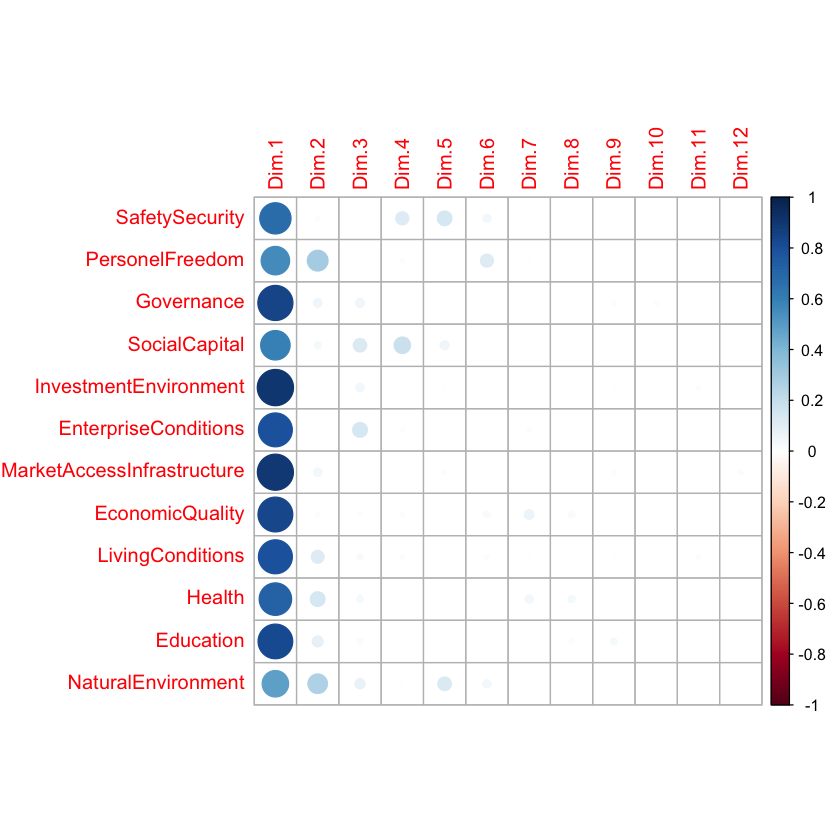

In [10]:
res.var <- get_pca_var(scaled_pca_data)
corrplot(res.var$cos2, is.corr=TRUE) # Quality of representation


The heatmap visualizes the contribution of each variable to the different principal components. This plot helps to identify which variables are most influential in defining the principal components. The intensity and size of the circles represent the magnitude of each variable's contribution to the respective principal components.


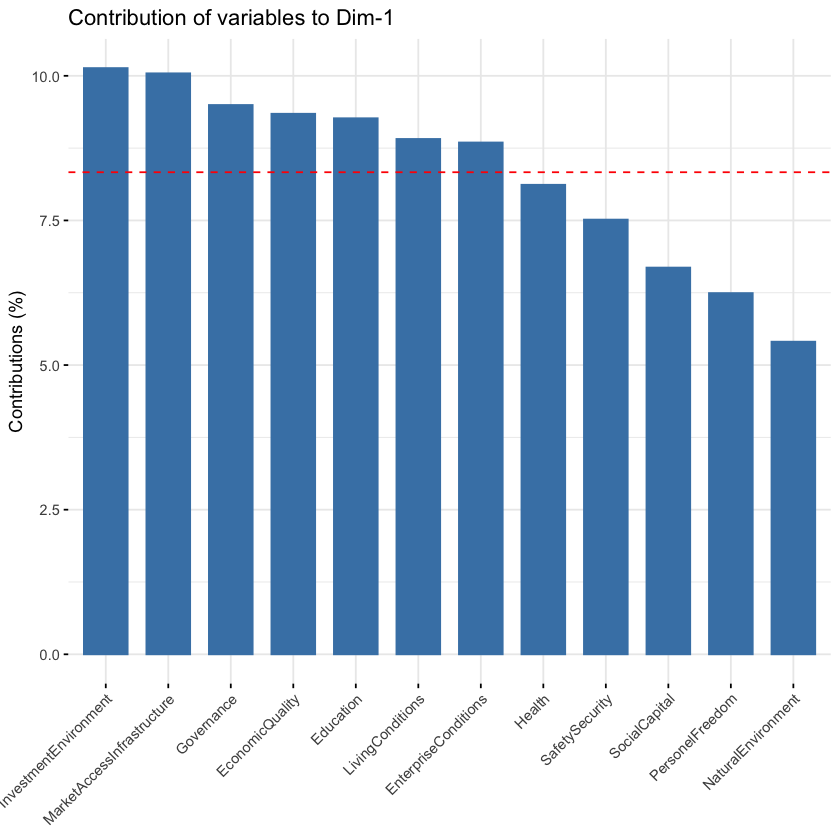

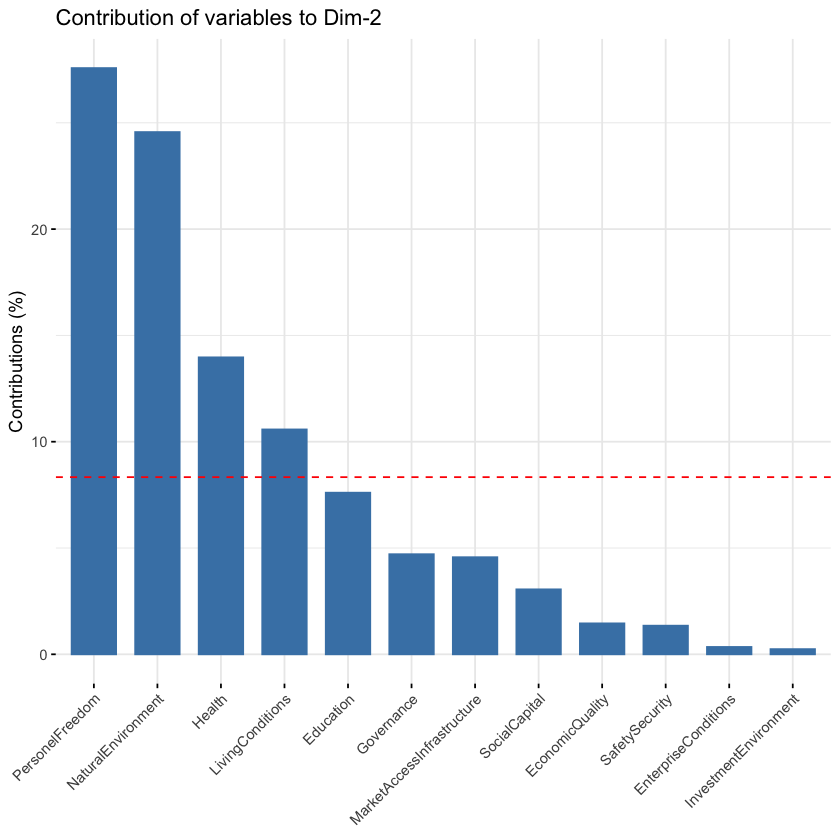

In [11]:
fviz_contrib(scaled_pca_data, choice = "var", axes = 1, top = 13)
fviz_contrib(scaled_pca_data, choice = "var", axes = 2, top = 13)


### Interpretation and Dimension Selection
- **Significance of PC1 and PC2:** The Scree Plot and explained variance summary both indicate that the first two principal components capture the majority of the dataset's variability. This makes them crucial for understanding the data's structure.
- **Contribution of Subsequent Components:** The subsequent components (from PC3 onwards) each explain a much smaller proportion of the variance, with diminishing returns. For instance, PC3 explains only 4.5% and PC4 explains 3.2% of the variance.
- **Dimension Selection:** Given that PC1 and PC2 together explain 83.4% of the variance, selecting these two dimensions is sufficient for capturing the most important aspects of the data. This reduces complexity while retaining the majority of the information.

### Conclusion
Choosing two dimensions (PC1 and PC2) for PCA is sufficient for this dataset, as it captures most of the variance and simplifies further analysis and visualization. This approach helps in reducing the dimensionality of the data while retaining the critical information needed for meaningful insights. Notably, the representation of certain variables such as Social Capital, Health, and Natural Environment is significantly improved in the scaled data, making it a more suitable model for further analysis. Consequently, more detailed statistical analyses will be performed on this scaled dataset to provide comprehensive insights.

### Variable Plot - PCA (Cos2)


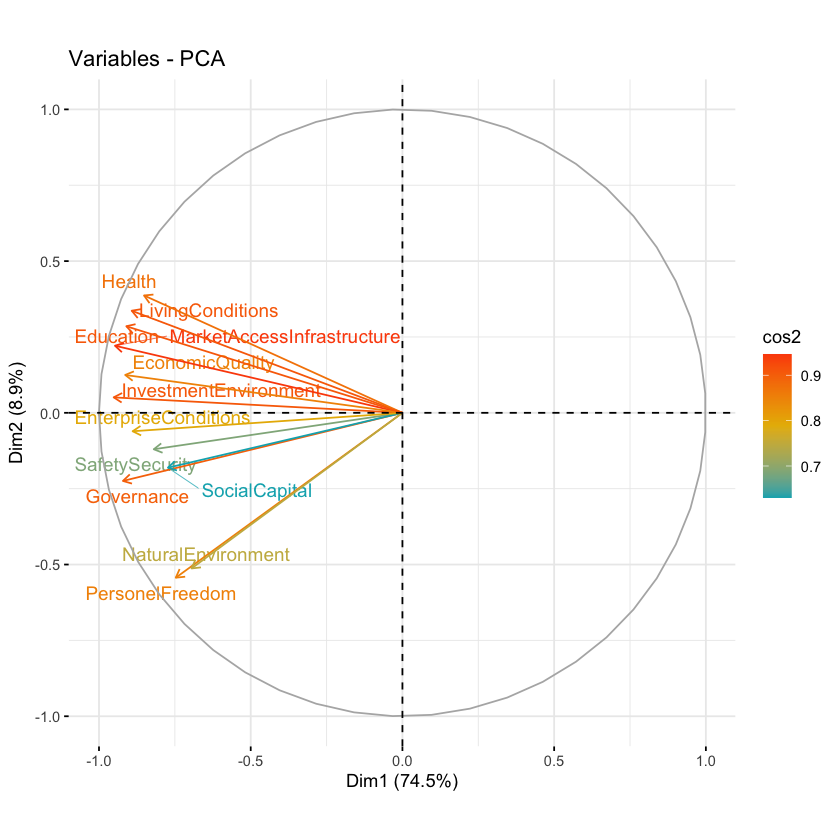

In [12]:
fviz_pca_var(scaled_pca_data, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
)

The Variable Plot with cos2 values shows the relationship between variables and the first two principal components. The vectors indicate the direction and magnitude of each variable's contribution to the components. The color gradient represents the cos2 values, indicating the quality of representation for each variable. Variables with high cos2 values, such as Health, Living Conditions, Education, Market Access Infrastructure, and Economic Quality, are well represented in the first two dimensions. This indicates that these variables play a significant role in the principal components and contribute strongly to the overall structure of the data.

### Contribution Plots - Dim1 and Dim2



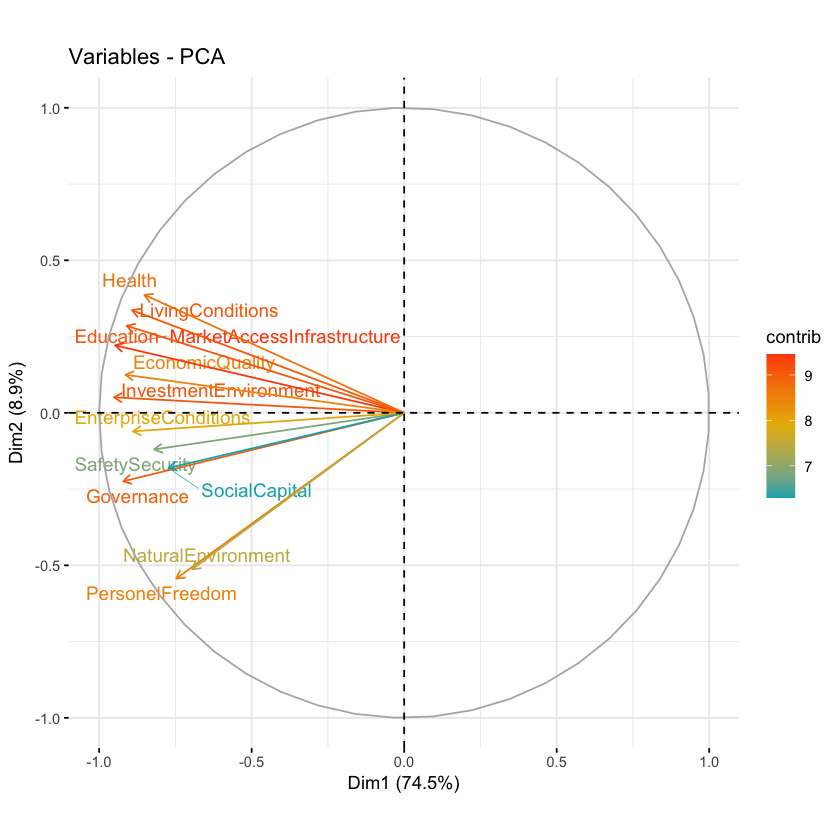

In [13]:
fviz_pca_var(scaled_pca_data,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

The Contribution Plots for Dim1 and Dim2 highlight the variables that contribute the most to the first two principal components. For Dim1, the top contributors are Investment Environment, Market Access Infrastructure, Governance, Economic Quality, and Education. These variables drive the majority of the variability captured by the first principal component, indicating their critical importance in understanding the overall structure of the dataset. For Dim2, the most significant contributors are Personal Freedom, Natural Environment, and Health. These variables influence the variability captured by the second principal component, showing their importance in explaining differences in these specific areas.

### Individuals Plot - PCA

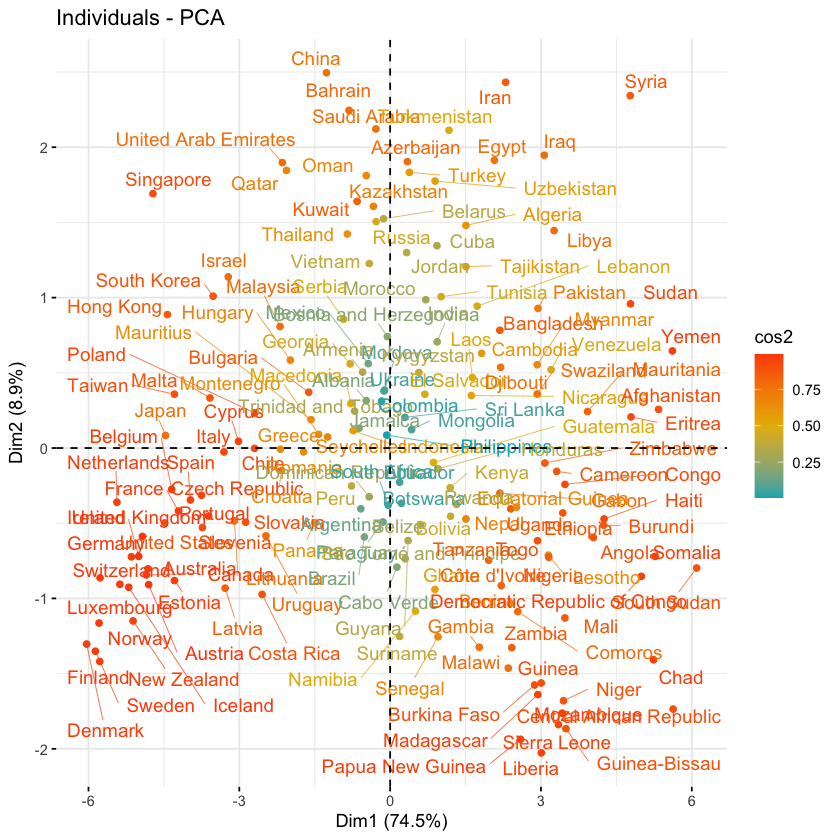

In [14]:
fviz_pca_ind(scaled_pca_data,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

The Individuals Plot illustrates the distribution of countries based on the first two principal components. Each point represents a country, and the color gradient reflects the cos2 values, indicating the quality of representation. Countries like Denmark, Sweden, and Iceland are well represented along Dim1, while countries like China, Bahrain, and Iran show higher representation along Dim2. This indicates how countries differ from each other in terms of prosperity indicators and which components explain these differences.

### Conclusion
The PCA analysis using scaled data reveals significant insights into the relationships between variables and the overall structure of the dataset. Variables with high cos2 values indicate that the principal components explain a large portion of the data's variability. The key contributing variables to Dim1 and Dim2 are crucial for understanding the data's overall structure. The distribution of countries in the Individuals Plot shows global differences in prosperity indicators and which components explain these differences. Given the improved representation of variables such as Social Capital, Health, and Natural Environment in the scaled data, this model is more suitable for further analysis. Consequently, more detailed statistical analyses will be conducted on this scaled dataset to provide comprehensive insights.

# DISTANCE MATRIX VISUALIZATION


In [15]:
raw_dist_eucl <- dist(data, method = "euclidean")
raw_dist_manh <- dist(data, method = "manhattan")

pca_dist_eucl <- dist(pca_data$x[, 1:2], method = "euclidean")
pca_dist_manh <- dist(pca_data$x[, 1:2], method = "manhattan")

scaled_data <- scale(data, center = TRUE, scale = TRUE)
scaled_dist_eucl <- dist(scaled_data, method = "euclidean")
scaled_dist_manh <- dist(scaled_data, method = "manhattan")

These six plots show the Euclidean and Manhattan distances for raw data, PCA-transformed data, and scaled data. Each plot represents the distances between data points using a color gradient; blue indicates larger distances, while red indicates smaller distances.

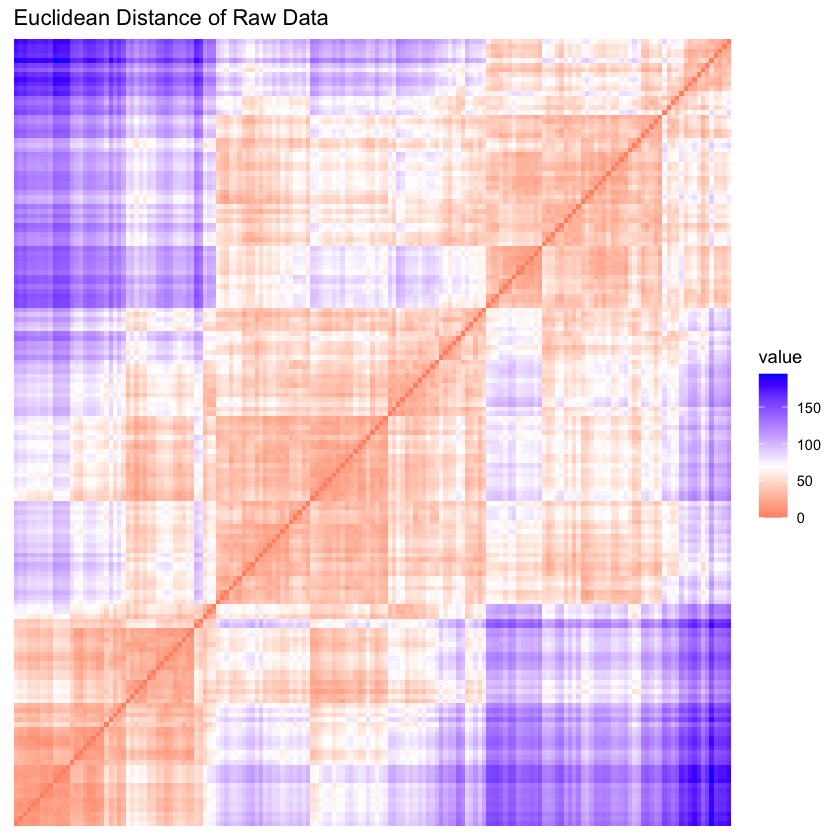

In [16]:
plot1 <- fviz_dist(raw_dist_eucl, show_labels = FALSE) +
  labs(title = "Euclidean Distance of Raw Data") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot1

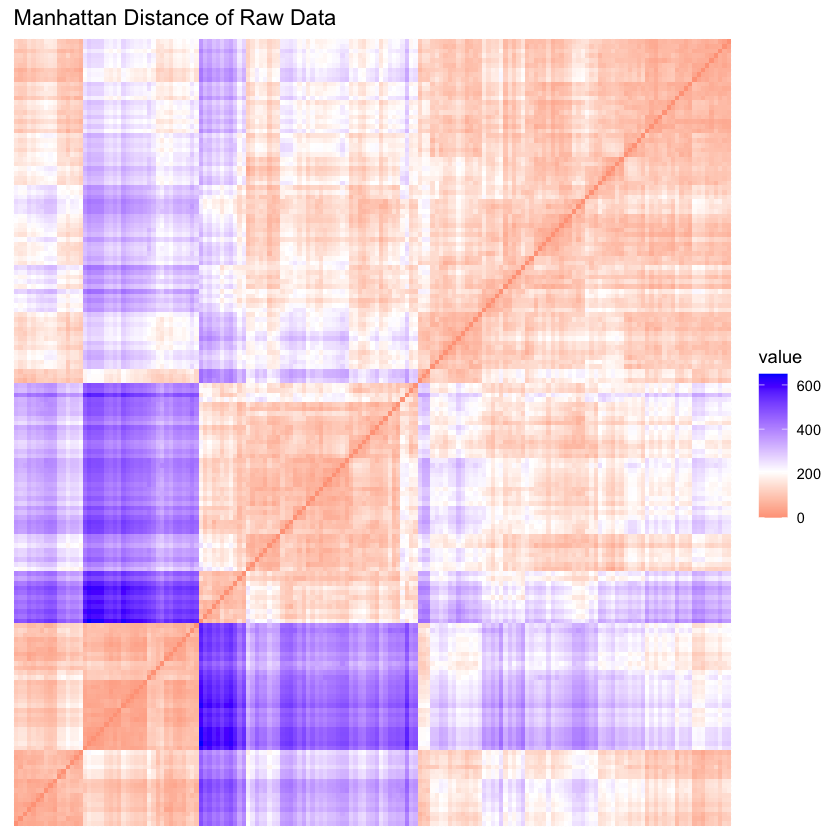

In [17]:
plot2 <- fviz_dist(raw_dist_manh, show_labels = FALSE) +
  labs(title = "Manhattan Distance of Raw Data") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot2

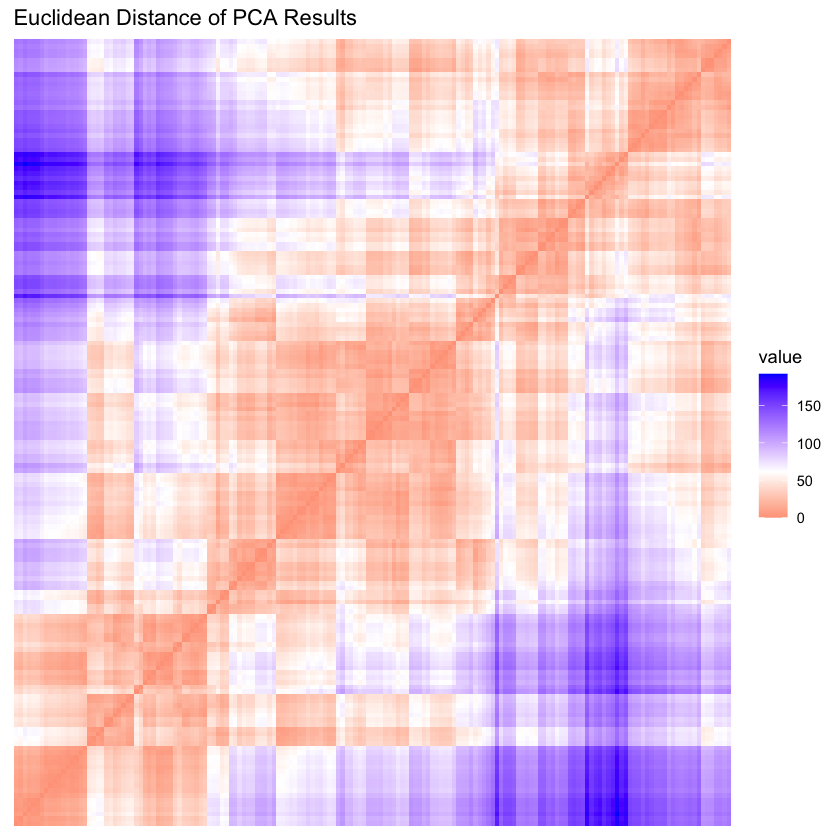

In [18]:
plot3 <- fviz_dist(pca_dist_eucl, show_labels = FALSE) +
  labs(title = "Euclidean Distance of PCA Results") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot3

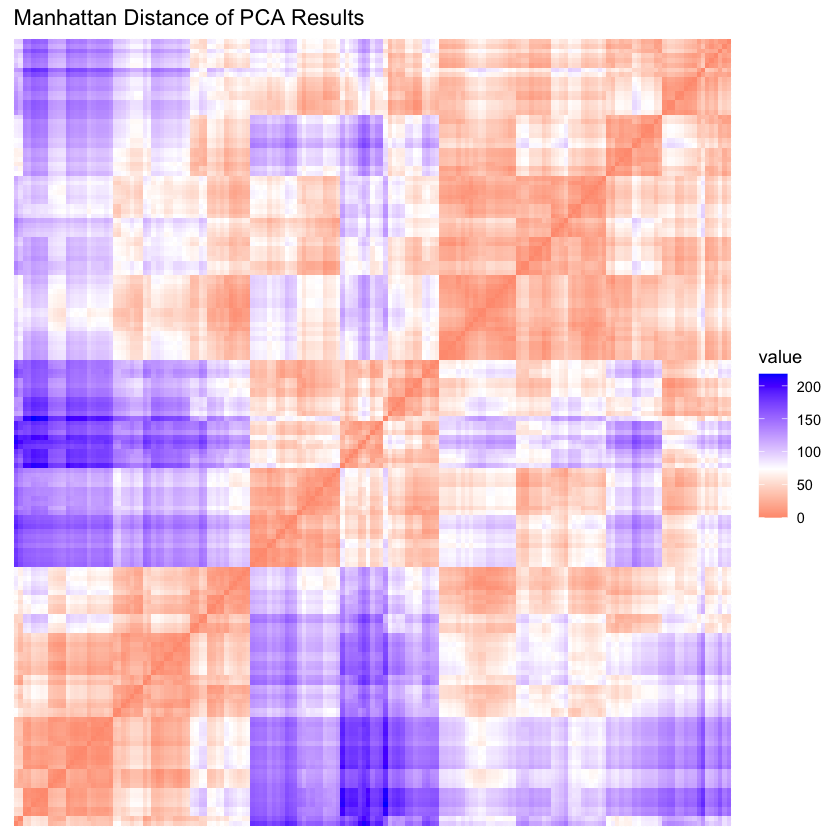

In [19]:
plot4 <- fviz_dist(pca_dist_manh, show_labels = FALSE) +
  labs(title = "Manhattan Distance of PCA Results") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot4

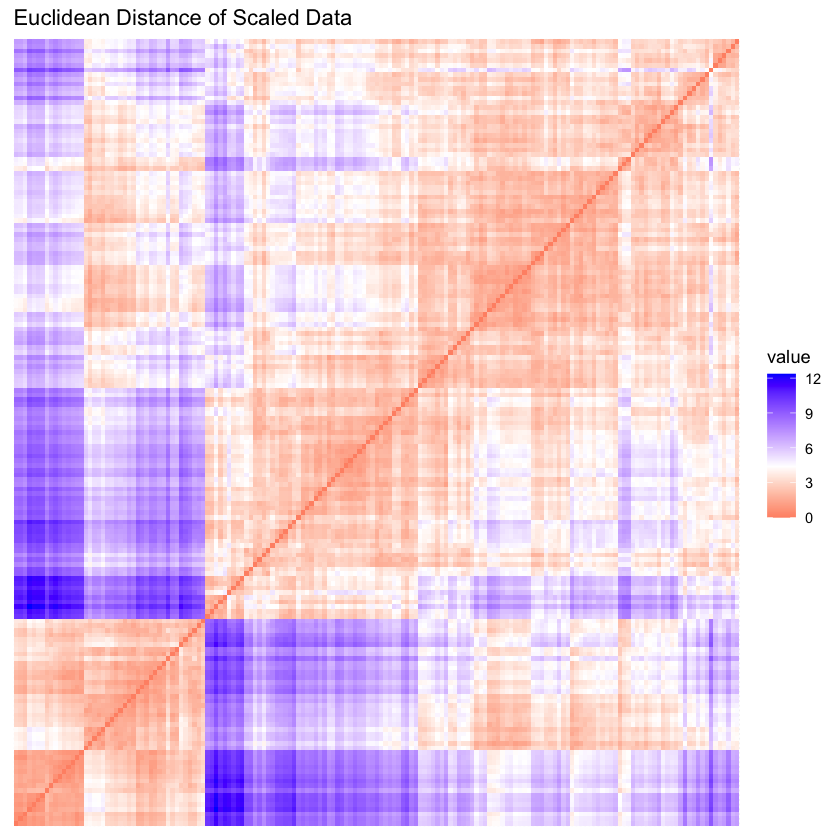

In [20]:
plot5 <- fviz_dist(scaled_dist_eucl, show_labels = FALSE) +
  labs(title = "Euclidean Distance of Scaled Data") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot5


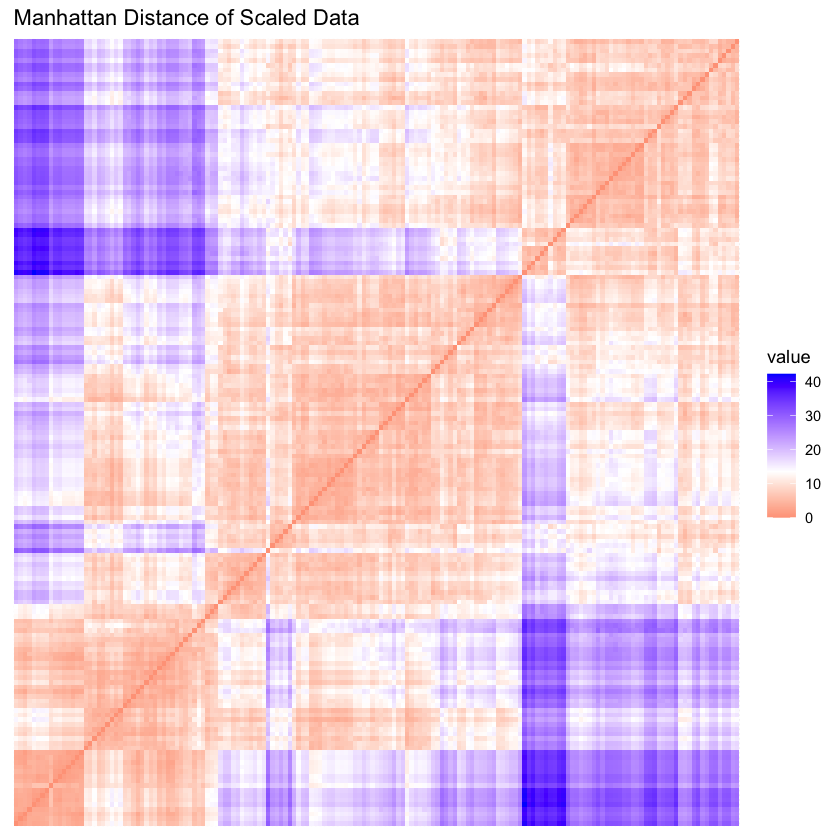

In [21]:
plot6 <- fviz_dist(scaled_dist_manh, show_labels = FALSE) +
  labs(title = "Manhattan Distance of Scaled Data") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot6

## COMBINED ANALYSIS


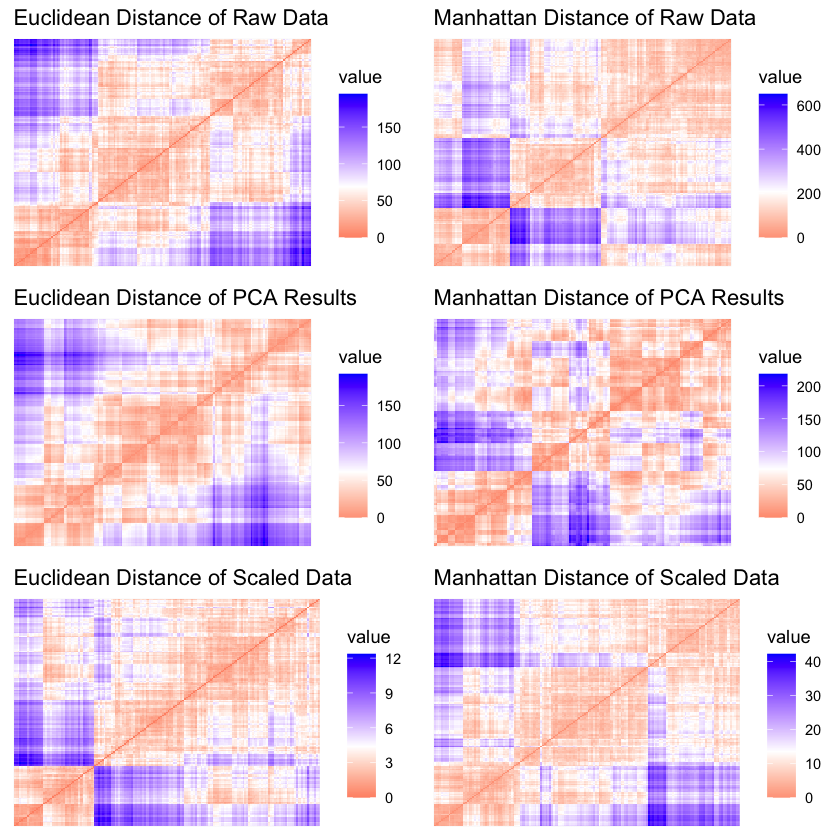

In [23]:
grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, ncol = 2)


Comparing all six plots, it is evident that the scaled data (both raw and PCA results) with Euclidean and Manhattan distances provides more distinct clustering patterns. Particularly, the Euclidean Distance of PCA Results plot stands out for showing the clearest groupings. This indicates that the PCA-transformed data using Euclidean distance is the most suitable for determining clusters. The reduced dimensions and scaled features help highlight the intrinsic structure of the data, making it ideal for clustering analyses.

# CONCLUSION AND FUTURE WORK
In light of these visualizations and analyses, future notebooks will focus on clustering analyses using the PCA-transformed scaled data. This approach highlights the most important components of the data, enabling the formation of more meaningful and consistent clusters. The Euclidean distance will be used as the distance metric during the clustering process, as this metric provides results that better capture the structural properties of the data and show distinct clustering patterns.

These analyses provide a solid foundation for future work. By applying different clustering algorithms such as K-means and K-medoids, we will further explore the subgroups within the data and better understand the characteristics of each cluster. This will allow us to uncover deeper relationships between the levels of development and prosperity indicators of countries.